<a href="https://colab.research.google.com/github/V1n1ci0s/projeto-Kayo_ter-a/blob/main/Taxa%20de%20suic%C3%ADdio%20no%20Brasil%20em%2030%20anos/An%C3%A1lise_da_taxa_de_suic%C3%ADdio_no_Brasil_(1985_2015).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETEMBRO AMARELO: Análise da taxa de suicídio no Brasil (1985 - 2015)

![texto alternativo](https://github.com/Patotricks15/Ciencia-de-dados-projetos/blob/master/Taxa%20de%20suic%C3%ADdio%20no%20Brasil%20em%2030%20anos/setembroamarelo.jpg?raw=true)

## Introdução

Émile Durkheim define o suicídio como “todo caso de morte que resulta de um ato executado pela própria vitima.” [1]. Ou seja, a própria pessoa tira sua vida.
O que costumamos observar em indivíduos que recorrem a esta atitude é a situação psicológica que o mesmo se encontra. A não recuperação de um trauma, seja ele recente ou não; a perda recente de algum ente querido são exemplos de fatores que influenciam muito a pessoa na escolha de por um fim no que está vivendo.

  O setembro amarelo foi criado em 2014, com o intuito de ajudar na prevenção do suicídio através de campanhas midiáticas, para que esse assunto traga a população para mais perto, a fim de pensar no problema.  Afinal, falar sobre esse esse ato extremo torna-se cada vez mais necessário, já que os casos vem aumentando nos últimos anos.

  A depressão vem sendo apontada como a grande vilã dessa história. Logo, é de primordial importância a identificação e o tratamento dessa doença, de preferencia nos estágios ainda inicias. Contudo, devido a falta de informação, as pessoas ainda tratam essa doença como uma "frescura", ignorando os seus sinais, e dessa forma agravando as suas consequências.

## Análise exploratória de dados

In [104]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
! pip install streamlit -q

In [49]:
cor_genero = ['#F781D8', '#819FF7']

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/V1n1ci0s/projeto-Kayo_ter-a/main/base%20dados.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


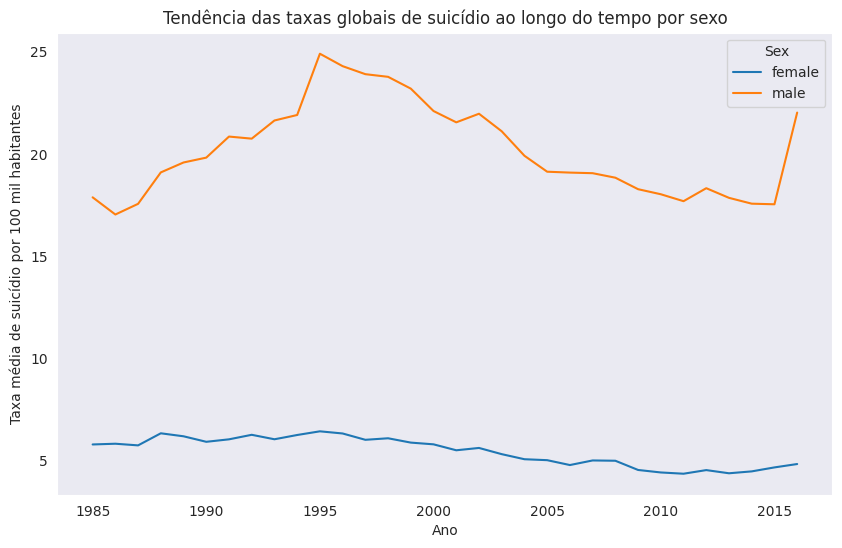

In [103]:
# @title Tendência das taxas globais de suicídio ao longo do tempo por sex

import matplotlib.pyplot as plt

df_trend = df.groupby(['year', 'sex'])['suicides/100k pop'].mean().unstack()

df_trend.plot(kind='line', figsize=(10, 6))
plt.xlabel('Ano')
plt.ylabel('Taxa média de suicídio por 100 mil habitantes')
plt.title('Tendência das taxas globais de suicídio ao longo do tempo por sexo')
_ = plt.legend(title='Sex')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Dicionário dos dados
---
**Country:** Coluna que representa os países *(string)*

**Year:** Coluna que representa os anos *(integer)*

**Sex:** Coluna que representa os gêneros *(string)*

**Age:** Coluna que representa as idades *(string)*

**Suicides_no:** Coluna que representa o número de suicídios *(integer)*

**Population:** Coluna que representa a população *(integer)*

**Suicides/100k pop:** Coluna que representa o número de suicídio a cada 100 mil habitantes *(float)*

**Country-year:** Coluna que representa *(string)*

**HDI for year:** Coluna que representa o IDH em cada ano *(float)*

**Gdp_for_year ($):** Coluna que representa o PIB em cada ano *(string)*

**Gdp_per_capita ($):** Coluna que representa o PIB per capita *(float)*

**Generation:** Coluna que representa a geração *(string)*


Como estamos tratando do caso Brasileiro, iremos limitar nosso dataframe, selecionando apenas o "Brazil" na coluna "Country"

In [52]:
df_brasil = df[df['country']=='Brazil'].copy()
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [53]:
df_brasil.shape

(372, 12)

Excluiremos alguns dados nulos para que não tenhamos problemas na plotagem dos gráficos e análises estatísticas.

In [54]:
print('Mundo------------')
display(df.isnull().sum())
print('Brasil----------')
display(df_brasil.isnull().sum())


Mundo------------


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Brasil----------


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

### Média de suicídio no Brasil X no mundo

---
Primeiro faremos uma análise comparativa da média de suicídios no Brasil x no mundo. É importante verificar a tendência ao longo do tempo, para termos um diagnóstico geral sobre o comportamento da variável.

Sabendo o comportamento da variável, podemos tentar traçar possíveis explicações para o fenômeno. Talvez,  a ciência de dados não seja a ferramenta necessária para isso, poderíamos recorrer a outras ferramentas para explicar o fenômeno

''

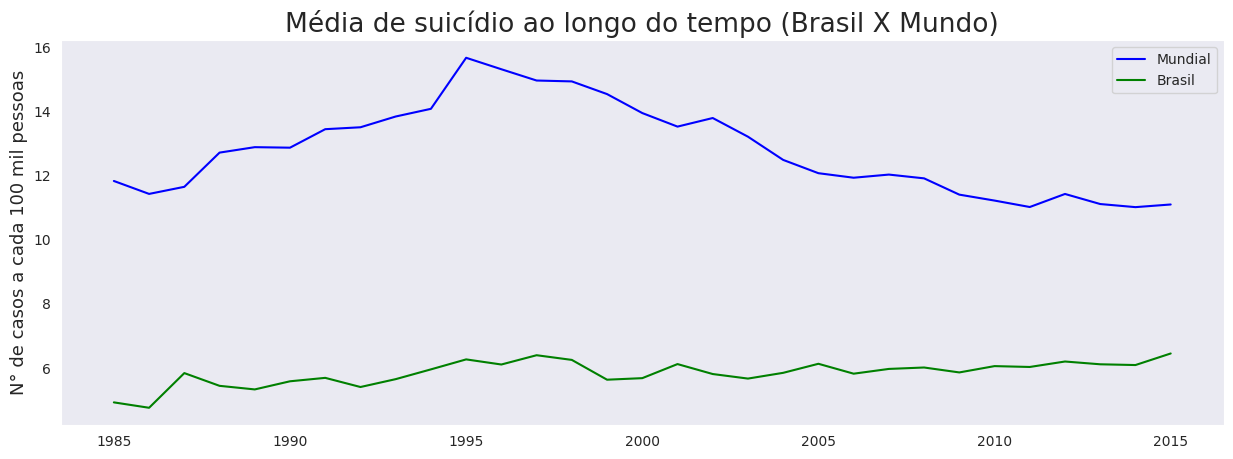

In [55]:
#Pegar a média mundial e do Brasil em suicídios
anos = df_brasil.year.unique()
suicidio_brasil_media = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicidio_mundial_media = df.groupby('year')['suicides/100k pop'].mean()
gdp_media_mundo = df.groupby('year')['gdp_per_capita ($)'].mean()
gdp_media_brasil = df_brasil.groupby('year')['gdp_per_capita ($)'].mean()

suicidio_mundial_media.drop(2016, inplace=True)

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=suicidio_mundial_media, label='Mundial', color='blue')
ax = sns.lineplot(x=anos, y = suicidio_brasil_media, label='Brasil', color='green')
plt.title('Média de suicídio ao longo do tempo (Brasil X Mundo)', fontsize=19)
plt.ylabel('N° de casos a cada 100 mil pessoas',fontsize=13)
;

A média de suicídio no Brasil vem **aumentando** a uma taxa pequena. Essa média de suicídio foi de **59,18** a cada 100 mil habitantes em 1985 até **77,45** a cada 100 mil habitantes em 2015, crescendo cerca de **30,87%**, uma média aproximada de **1,03%** ao ano.

Por outro lado, a média de suicídio mundial vem **reduzindo** ao longo do tempo, mas nem sempre foi assim. De 1985 até 1995 o número de suicídios a cada 100 mil habitantes cresceu cerca de **115%**, porém isso logo mudou, chegando à uma redução de aproximadamente **85,35%** nos números entre 1995 até 2015, aproximadamente **4,26%** ao ano. Ao longo dos 30 anos analisados, a taxa de redução foi de **68,47%**, aproximadamente **2,30%** ao ano.

In [56]:
df.groupby('year')['suicides/100k pop'].sum()

year
1985     6811.89
1986     6579.84
1987     7545.45
1988     7473.13
1989     8036.54
1990     9878.75
1991    10321.06
1992    10528.88
1993    10790.29
1994    11483.79
1995    14660.26
1996    14142.21
1997    13817.83
1998    14150.72
1999    14473.91
2000    14387.45
2001    14276.21
2002    14227.72
2003    13627.58
2004    12581.80
2005    12164.99
2006    12166.01
2007    12410.15
2008    12145.84
2009    12176.04
2010    11843.99
2011    11367.84
2012    11101.91
2013    10663.64
2014    10306.73
2015     8253.99
2016     2147.39
Name: suicides/100k pop, dtype: float64

Podemos observar que, a média de suicídio vem diminuindo desde 1995 no mundo, enquanto o Brasil continua com um crescimento (não muito alto) nessa média. E para entender melhor esse comportamento, seria mais viável um estudo da área de psicologia e/ou sociologia para entender melhor esse fenômeno e como o Brasil e os brasileiros estão se relacionando com ele.

### Faixa etária

---

Para entendermos melhor quem são as pessoas que estamos estudando, podemos classificá-los por faixa etária. A faixa etária vai nos dar um panorama básico de quem comete suicídio.
O objetivo aqui é identificar qual a faixa etária que tem a maior representatividade entre aqueles que tiram a própria vida, e identificar se houve alguma mudança no perfil ao longo do período estudado

In [57]:
tabela = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '+75 years']
tabela = tabela.reindex(column_order, axis=1)
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,NaN
1986,31.0,508.0,505.5,651.0,372.0,NaN
1987,33.5,502.0,565.5,724.5,422.0,NaN
1988,30.0,472.0,557.5,724.0,356.0,NaN
1989,31.5,491.5,569.0,692.5,354.5,NaN


In [80]:
tabela2 = pd.pivot_table(df_brasil, values ='suicides/100k pop',index=['sex'],columns=['year'])
tabela2 = tabela2.T

In [81]:
26267 / tabela.sum().sum()

0.2414512630069493

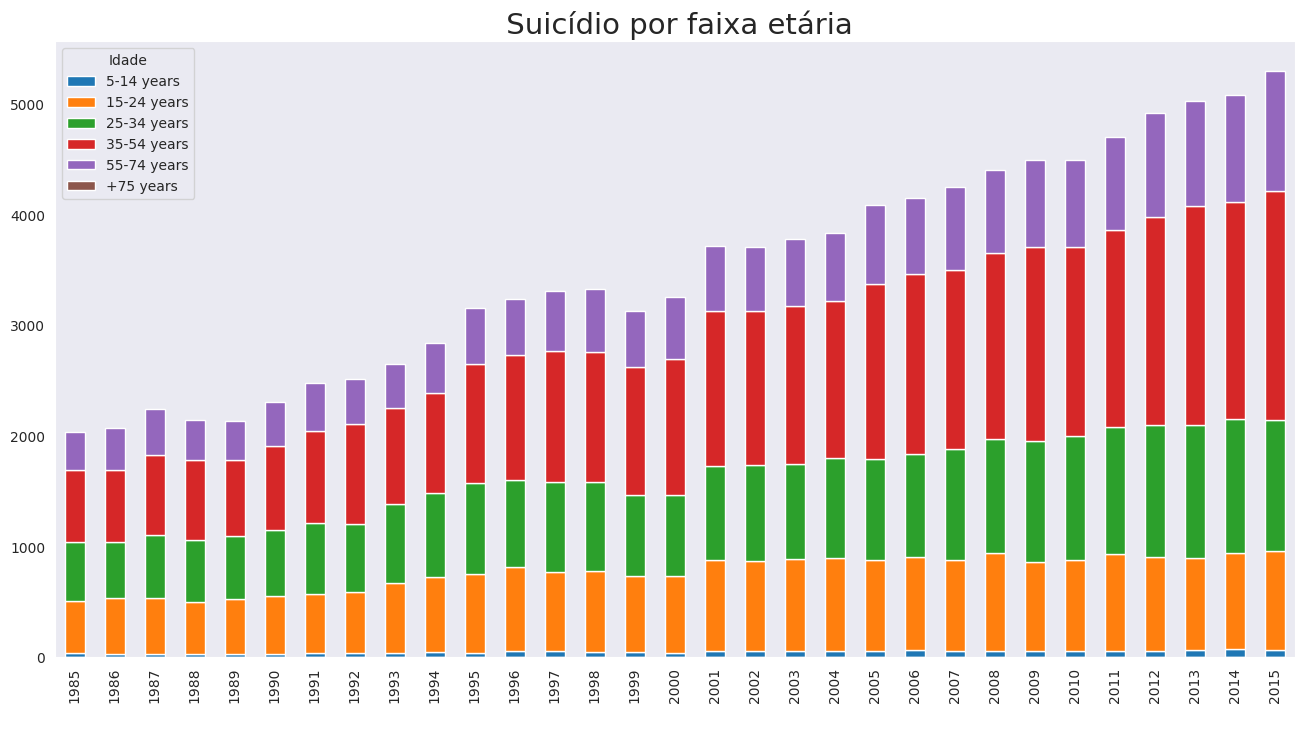

In [82]:
tabela.plot.bar(stacked=True,figsize=(16,8))
plt.legend(title='Idade')
plt.xlabel(' ')
plt.title(' Suicídio por faixa etária',fontsize=21);

A faixa etária com maior número de suicídios foi de 35 a 54 anos, com  39930 (**36,70%**), seguido de 25 a 34 anos de idade 26267 de 25 a 34 anos (**24,14%**).


In [83]:
df_brasil['generation'].value_counts().sum()

372

In [84]:
82 / df_brasil['generation'].value_counts().sum().sum()

0.22043010752688172

**Generation X:** Geração X é uma expressão que se refere à geração nascida após o baby boom pós-Segunda Guerra Mundial. Embora não haja acordo em relação ao período que a expressão abrange, ela geralmente inclui as pessoas nascidas a partir dos anos 1960 até o final dos anos 1970. [2]

**Silent:** Geração Silenciosa é um termo usado para se referir à população nascida entre 1925 e 1942, nomeadamente durante a Grande Depressão e Segunda Guerra Mundial. [3]


**Millenials:** A geração Y, também chamada geração do milênio, geração da internet, ou milênicos é um conceito em Sociologia que se refere à corte dos nascidos após o início da década de 1980 até, aproximadamente, o final do século. Alguns autores consideram até 2005. [4]

**Boomers:** Baby boomers dá nome à geração de pessoas nascidas entre os anos de 1946 e 1964. A expressão pode ser livremente traduzida como “explosão dos bebês”. O termo “explosão” é usado aqui com o sentido de “crescimento desenfreado”, o qual causou um “boom” demográfico no planeta, especialmente nos Estados Unidos. [5]

**G.I. Generation:** Geração grandiosa (em inglês, Greatest generation) é uma expressão cunhada pelo jornalista e escritor Tom Brokaw, em seu livro The Greatest Generation, para se referir à geração formada pelos indivíduos que cresceram durante a Grande Depressão (1929–39) nos Estados Unidos e depois participaram dos combates da Segunda Guerra Mundial (1939–45, com participação dos EUA entre 1941 e 1945), bem como por aqueles que, permanecendo no país, participaram do esforço de guerra no chamado home front. [6]

**Generation Z:** A Geração Z é a definição sociológica para a geração de pessoas nascidas, em média, entre a segunda metade dos anos 1990 até o início do ano 2010. A teoria mais aceita por estudiosos é que surgiu como sucessória à Geração Y, do final de 1982 (começo do Echo Boom). Portanto, é a geração que corresponde à idealização e nascimento da World Wide Web, criada em 1990 por Tim Berners-Lee, e no "boom" da criação de aparelhos tecnológicos modernos. A grande nuance dessa geração é zapear, tendo várias opções, entre canais de televisão, internet, vídeo game e smartphones. [7]

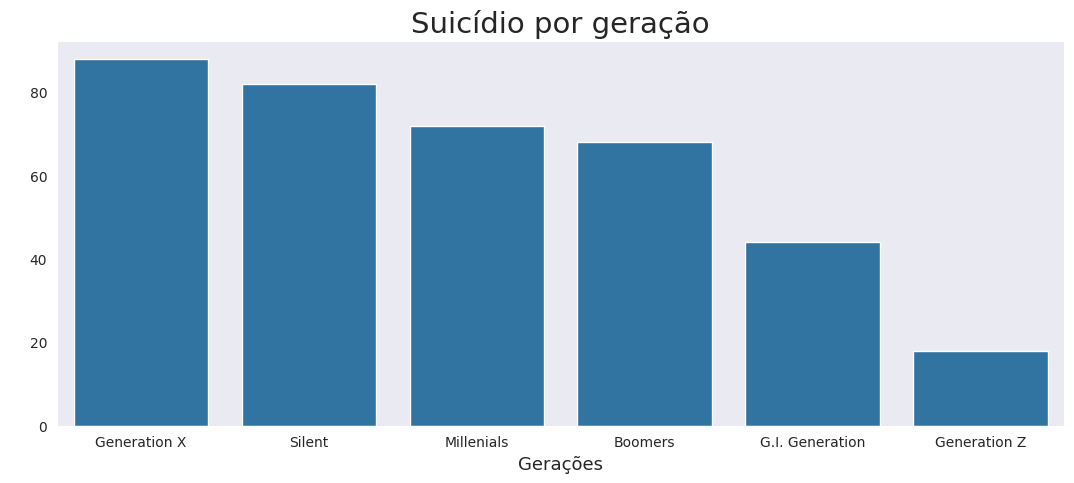

In [85]:
fig = plt.figure(figsize=(13,5))
sns.countplot(x='generation', order = df_brasil['generation'].value_counts().index, data = df_brasil) # Changed 'generation' to x='generation'
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Suicídio por geração',fontsize=21);

A Geração com o maior número de suicídios registrado foi a Geração X (**23,65%**), seguido pela Geração Silenciosa (**22,04%**).

Entendendo a faixa etária podemos direcionar nossa mensagem de forma mais eficiente, pois daremos um foco a quem mais é afetado. Como fazer isso? Intensificando campanhas e debates nos locais onde essas pessoas costumam frequentar.

### Gênero

---
Outra característica interessante é o gênero. Entender a diferença dos gêneros na tendeência ao suicídio pode, novamente, nos ajudar a direcionar o foco da mensagem, além de entender alguns padrões sociais


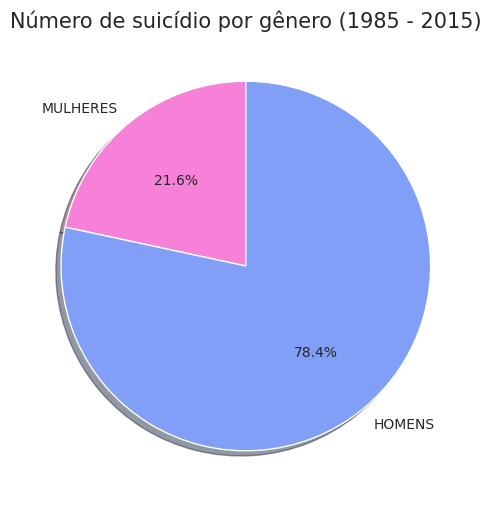

In [86]:
generos = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

fig = plt.figure(figsize=(6,6))
plt.pie(generos, labels=['MULHERES', 'HOMENS'], colors = cor_genero, autopct='%1.1f%%', shadow = True, startangle=90)
plt.title('Número de suicídio por gênero (1985 - 2015)', fontsize=15);

In [87]:
#Quantas vezes a mais o homem se suicida em relação às mulheres?
df_brasil.groupby('sex').suicides_no.sum()[1] / df_brasil.groupby('sex').suicides_no.sum()[0]

3.62333979394063

Os homens se suicidam **3,62** vezes mais que as mulheres, e como podemos observar no gráfico abaixo, esse padrão vem se repetindo ao longo do tempo.

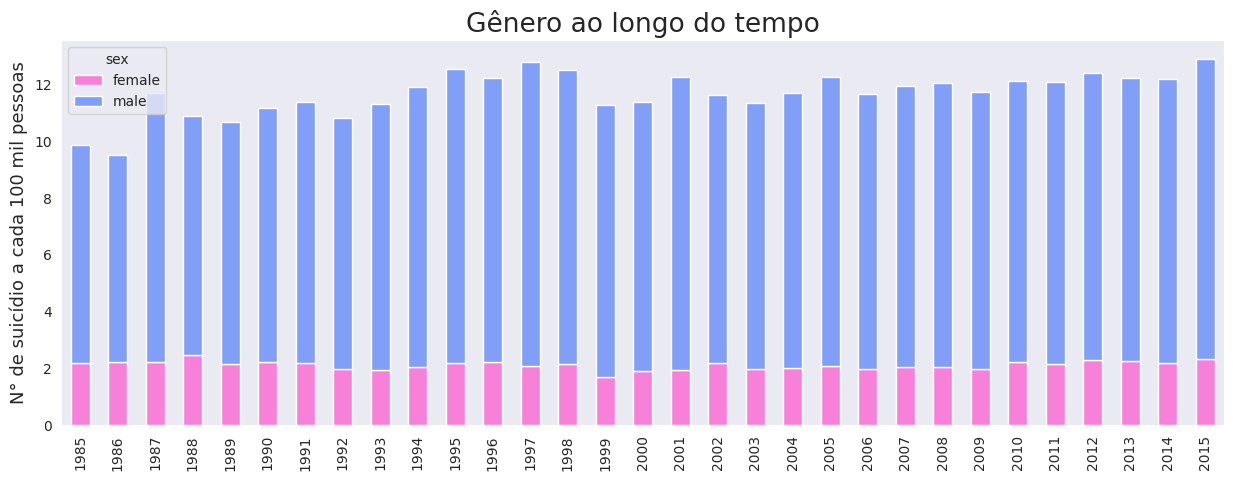

In [88]:
tabela2.plot.bar(stacked=True, figsize=(15,5), color=cor_genero)
plt.xlabel(' ')
plt.title('Gênero ao longo do tempo', fontsize=19)
plt.ylabel('N° de suicídio a cada 100 mil pessoas', fontsize=13);

### Faixa etária pelo número total de mortes

In [89]:
mulheres = df.groupby(['sex', 'age'])['suicides_no'].sum()[:6] # sexo e idade --> numero de suicidios --> somar e pegar os 6 primeiros
homens = df.groupby(['sex', 'age'])['suicides_no'].sum()[6:] # sexo e idade --> numero de suicidios --> somar e pegar os 6 ultimos
m = [] # Mulheres
h = [] # Homens
mn = [] # Numero de mulheres
hn = [] # Numero de homens
for i in range(6):
  m.append(mulheres.index[i][1].split(' ')[0])
  h.append(homens.index[i][1].split(' ')[0])
  mn.append(mulheres[i])
  hn.append(homens[i])


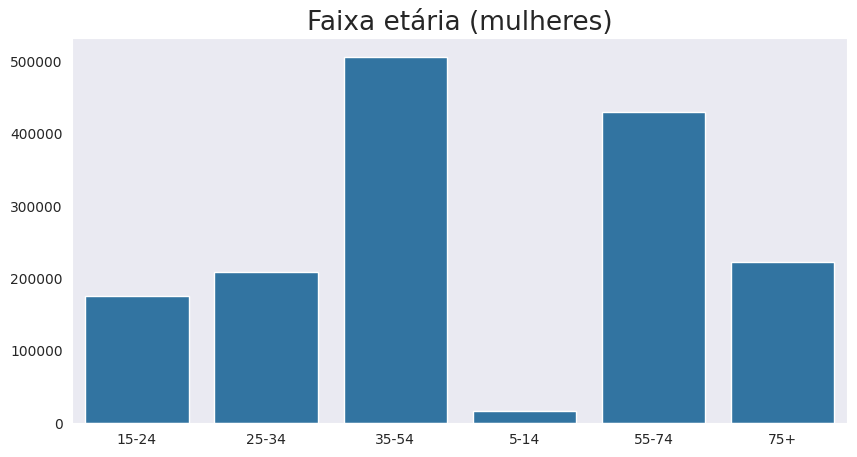

In [90]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=m, y = mn) # Remove the 'data' parameter as it's not needed when directly passing x and y values
plt.title('Faixa etária (mulheres)', fontsize=19);

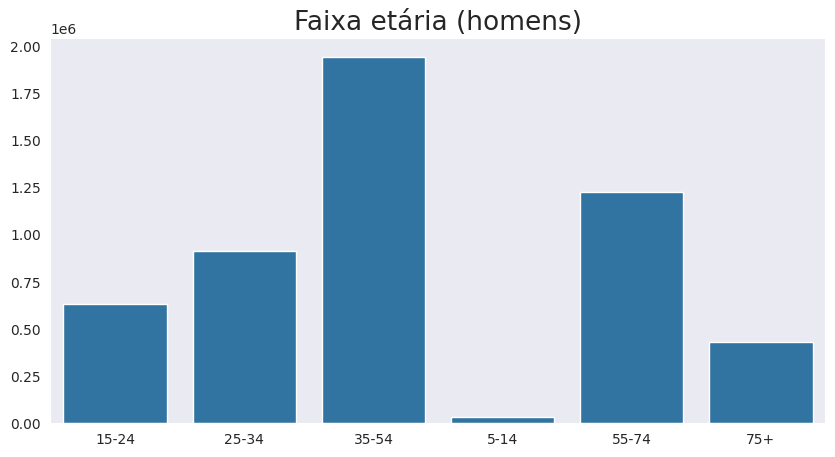

In [91]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=h, y = hn) # Remove the 'data' parameter as it's not needed when directly passing x and y values
plt.title('Faixa etária (homens)', fontsize=19);

In [92]:
print(f'''
Total de homens: {sum(hn)}
Total de mulheres: {sum(mn)}
''')


Total de homens: 5188910
Total de mulheres: 1559510



Agora que sabemos gfaixa etária e gênero, podemos direcionar ainda melhor nossa mensagem

### Dados econômicos

---
Por último, as análises econômicas são importantes fatores, pois com elas podemos ver se algumas variáveis influenciam ou se não fazem diferença no suicídio.

No nosso conjunto de dados, as variáveis econômicas são **PIB, PIB per capita** e **IDH**


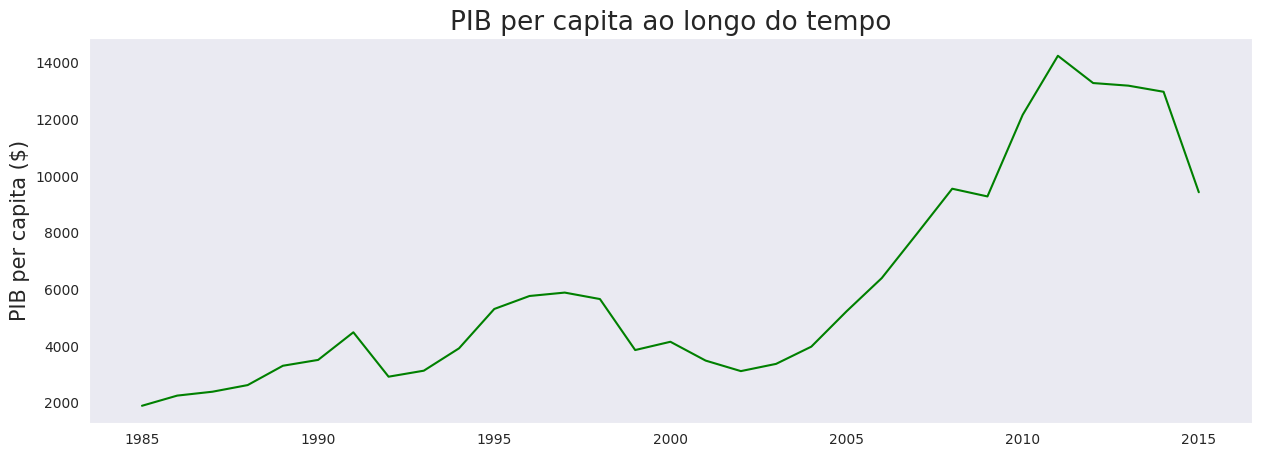

In [93]:

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=gdp_media_brasil, color = 'green')
plt.ylabel('PIB per capita ($)', fontsize=15)
plt.title('PIB per capita ao longo do tempo',fontsize=19);

''

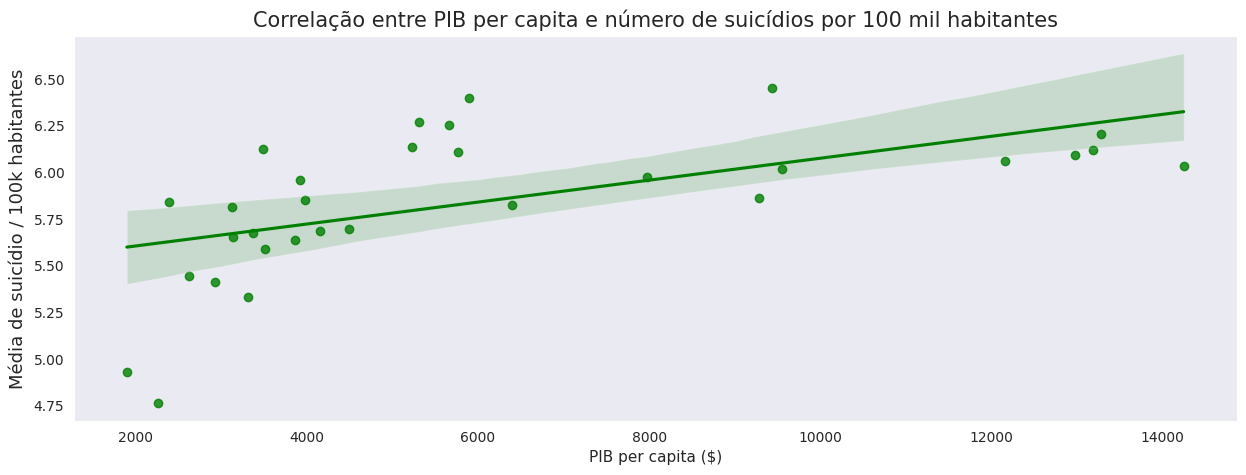

In [100]:
fig = plt.figure(figsize=(15,5))
sns.regplot(x=gdp_media_brasil, y =suicidio_brasil_media, data=df_brasil, color='green')
plt.title('Correlação entre PIB per capita e número de suicídios por 100 mil habitantes',fontsize=15)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
plt.xlabel('PIB per capita ($)',fontsize=11)
;


''

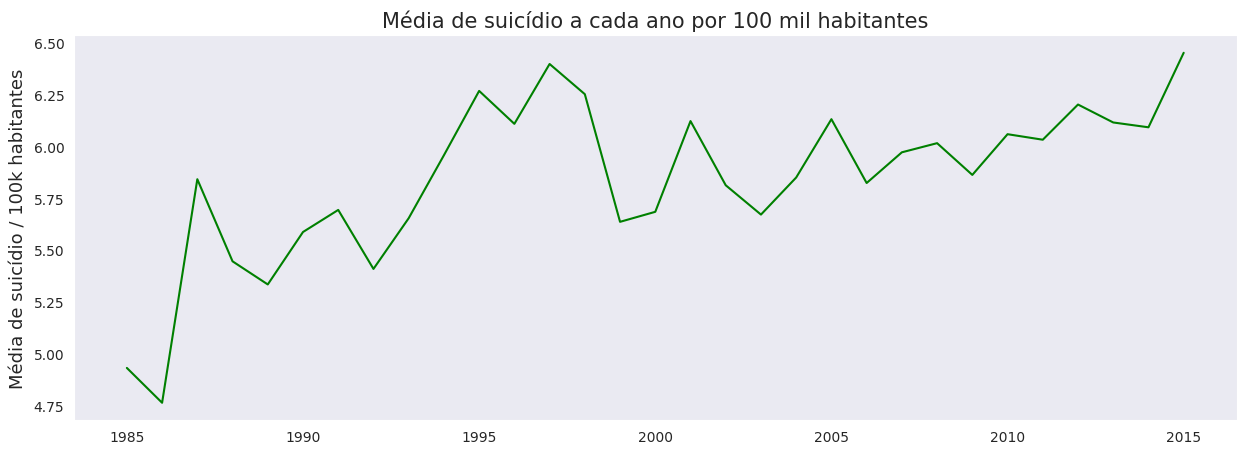

In [95]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=anos, y =suicidio_brasil_media, color = 'green')
plt.title('Média de suicídio a cada ano por 100 mil habitantes', fontsize=15)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
;

Podemos ver aqui, que mesmo com o PIB per capita aumentando, o número de suicídio a cada 100 mil habitantes não reduziu, mostrando que mesmo com o país crescendo o problema do suicídio não tomou outro rumo, e para explicar isso uma análise econômica e estatística talvez não seja suficiente.

''

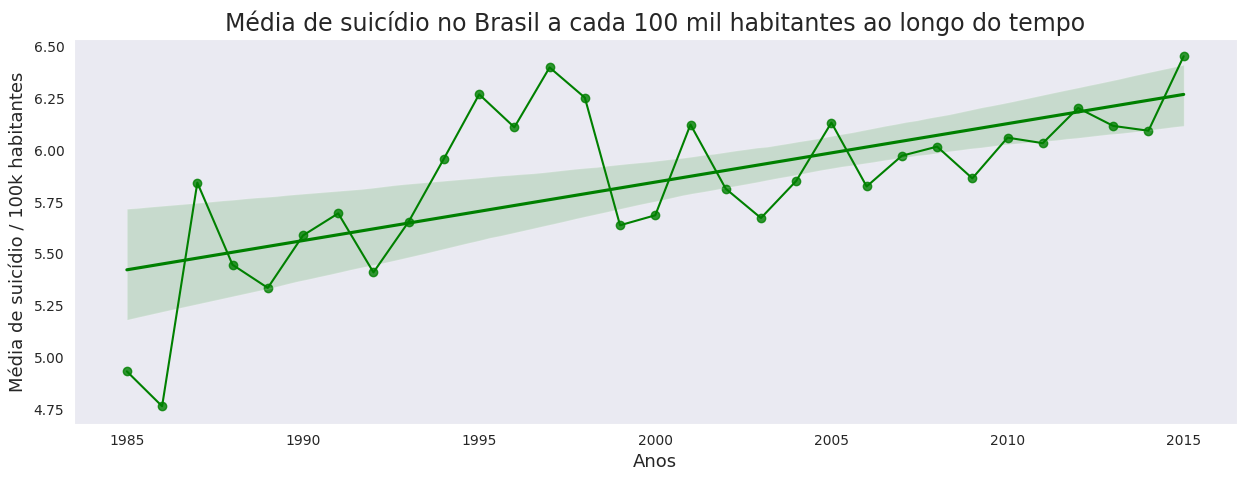

In [96]:
fig = plt.figure(figsize=(15,5))
sns.regplot(x=anos, y =suicidio_brasil_media, data=df_brasil, color='green')
plt.title('Média de suicídio no Brasil a cada 100 mil habitantes ao longo do tempo',fontsize=17)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
plt.xlabel('Anos',fontsize=13)
sns.lineplot(x=anos, y =suicidio_brasil_media, color = 'green')
;

O gráfico acima nos mostra que o número médio de suicídios foi crescendo ao longo do tempo, oscilando com alguns anos menos e alguns anos mais, porém a uma **taxa crescente**, fazendo com que o problema tenha continuado se agravando lentamente ao longo dos 30 anos analisados.

## Conclusão

---
Estudar temas como o suicídio nos ajuda a entender a relação das pessoas com a orópria vida, e perceber que não é um assunto tão simples. Analisar a tendência mundial e nacional é muito diferente de entender o que leva uma pessoa a cometer suicídio, não são apenas dados que nos dizem alguma coisa, não são apenas os insights sobre dados que nos contam histórias. Por trás do tema, existe uma ciência dedicada a estudar o suicídio com uma ótica diferente da Ciência de Dados, da Estatística e da Economia.


### Conclusão dos dados


---


**Taxas de suicídio:**

* A taxa de suicídio no Brasil se manteve crescente ao longo do período estudado (**1,03%** ao ano).
* A taxa de suicídio no Mundo vem reduzindo desde 1995 (**4,26%** ao ano)

**Maiores vítimas:**

* Homens (**78,4%**)
* Faixa etária 35-54 anos de idade (**36,70%**)
* Geração X (**23,65%**)

## Referências bibliográficas:


---


[1] **De Vares S. F, (2007).** O problema do suicídio em Émile Durkheim

[2] **Carlson, Elwood (2008).** The Lucky Few: Between the Greatest Generation and the Baby Boom.

[3] **Time Magazine (1951).** "The Younger Generation"

[4] **Dimock, Michael (2019).** Defining generations: Where Millennials end and Generation Z begins». Pew Research Center.

[5] **Willetts, David (2010).** The Pinch: How the Baby Boomers Took their Children's Future and How They Can Give it Back, Atlantic.

[6] **Brokaw, Tom (1998).** The Greatest Generation, Random House.

[7] **Sam Savage (2006).** The Generation Z Connection: Teaching Information Literacy to the Newest Net Generation

# ngrok

In [97]:
! pip install pyngrok

In [98]:
! ngrok authtoken 2h1kFWr6XTkAwDnwQrjrSpcUPtC_6uKthAGfGMHRXfN8ZfLLb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [99]:
from pyngrok import ngrok

public_url = ngrok.connect(8050)
public_url

<NgrokTunnel: "https://febd-34-134-44-40.ngrok-free.app" -> "http://localhost:8050">